<a href="https://colab.research.google.com/github/zmanaa/AE315_Teaching_Materials/blob/main/Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone or Not? Quadrotor UAV Detection and Tracking
> Mohssen Elshaar, Zeyad Manaa, and Mohammed Elbalshy.

Abstract—Unmanned Aerial Vehicless (UAVs) are becoming
increasingly common in various sectors, offering many benefits
but also posing significant challenges to privacy and safety.
This paper benchmarks state-of-art solutions for detecting and
tracking quadrotor UAVs to address these concerns. We leverage
cutting-edge deep learning models, specifically the YOLOv5 and
YOLOv8 series, to evaluate their performance in identifying
UAVs accurately and quickly. Additionally, we integrate a robust
tracking system, BoT-SORT, to ensure reliable monitoring
even under challenging conditions. Our tests on the DUT
dataset reveal that while YOLOv5 models generally outperform
YOLOv8 in detection accuracy, the YOLOv8 models excel in
recognizing less distinct objects, demonstrating their versatility
and advanced capabilities.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/13DxGsLURrWDfilr4j8JuxAx7PZHcN29w/view?usp=sharing)


# Import Weights and Test Data

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import os


def download_folder(drive, folder_id, dest_path):
    file_list = drive.ListFile({
        'q':
        f"'{folder_id}' in parents and trashed=false"
    }).GetList()
    for file in file_list:
        if file['mimeType'] == 'application/vnd.google-apps.folder':
            # Create a local directory for the subfolder
            local_subfolder_path = os.path.join(dest_path, file['title'])
            os.makedirs(local_subfolder_path, exist_ok=True)
            # Recursively download the subfolder
            download_folder(drive, file['id'], local_subfolder_path)
        else:
            # Download the file
            print(f"Downloading {file['title']} to {dest_path}")
            file.GetContentFile(os.path.join(dest_path, file['title']))


# Shared folder ID
shared_folder_id = '1s-YDj5SgdebxOpVTFXk5UE16cWO314CQ'
# Local destination path
dest_path = '/content/Imported_Data'
os.makedirs(dest_path, exist_ok=True)

# Start downloading
download_folder(drive, shared_folder_id, dest_path)

# GPU Specifications if available

In [ ]:
!nvidia-smi

Sun May 19 21:52:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# YOLOv5 s/x

## YOLOv5 Imports

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Install dependencies
%cd yolov5
!pip install -qr requirements.txt
%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 16620, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 16620 (delta 55), reused 63 (delta 29), pack-reused 16522
Receiving objects: 100% (16620/16620), 15.15 MiB | 29.26 MiB/s, done.
Resolving deltas: 100% (11408/11408), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
/content


## Detection Demo

In [ ]:
model_name = 'YOLOv5s' # or 'YOLOv5x'

weight_path = '/content/Imported_Data/Weights/' + model_name + '/best.pt'
results_path = '/content/Results/' + model_name
!python yolov5/detect.py --weights $weight_path --source "/content/Imported_Data/TestData/images" --name $results_path --conf 0.25

detect: weights=['/content/Imported_Data/Weights/YOLOv5s/best.pt'], source=/content/Imported_Data/TestData/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=/content/Results/YOLOv5s, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/6 /content/Imported_Data/TestData/images/00001.jpg: 384x640 1 UAV, 46.9ms
image 2/6 /content/Imported_Data/TestData/images/00007.jpg: 384x640 1 UAV, 7.5ms
image 3/6 /content/Imported_Data/TestData/images/000

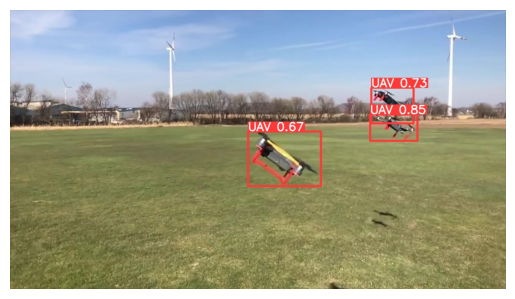

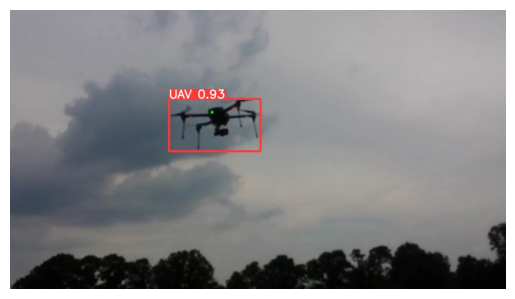

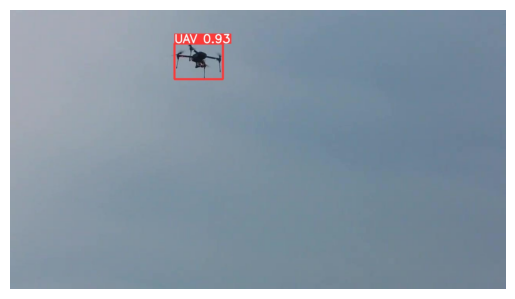

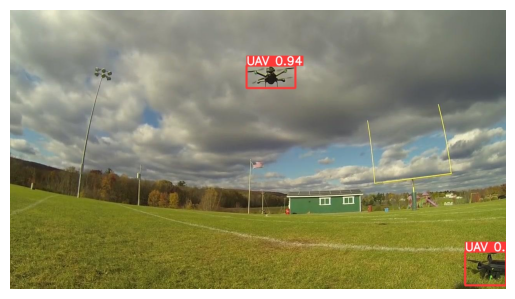

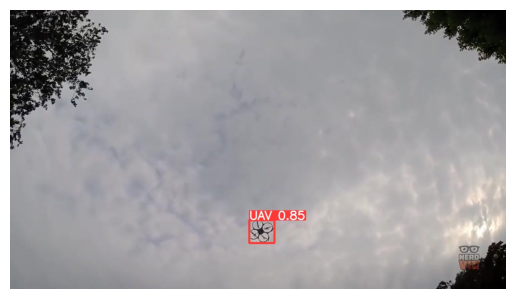

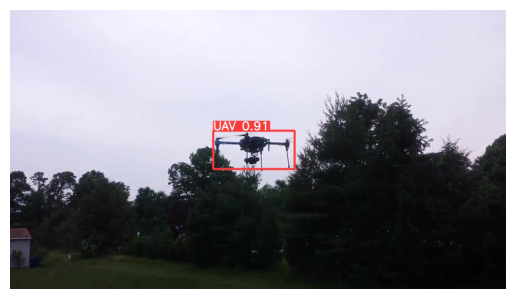

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob


# Function to display an image using matplotlib
def show_image(img_path):
    # Read the image using OpenCV
    img = cv2.imread(img_path)
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


# Get the list of result images
result_images = glob.glob('/content/Results/' + model_name +
                          '/*')  # Adjust the path if necessary
# Display each image
for img_path in result_images:
    show_image(img_path)

# YOLOv8 s/x

## Yolov8 Imports

In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.18
    Uninstalling ultralytics-8.2.18:
      Successfully uninstalled ultralytics-8.2.18


In [ ]:
from IPython import display

display.clear_output()

import ultralytics

ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.6/78.2 GB disk)


## Detection Demo

In [ ]:
model_name = 'YOLOv8s'  # or 'YOLOv8x'
weight_path = '/content/Imported_Data/Weights/' + model_name + '/best.pt'
results_path = '/content/Results/' + model_name

model = YOLO(weight_path)
results = model.predict(source='/content/Imported_Data/TestData/images',
                        save=True,
                        name=results_path)


image 1/6 /content/Imported_Data/TestData/images/00001.jpg: 384x640 1 UAV, 120.4ms
image 2/6 /content/Imported_Data/TestData/images/00007.jpg: 384x640 1 UAV, 10.7ms
image 3/6 /content/Imported_Data/TestData/images/00014.jpg: 384x640 1 UAV, 10.6ms
image 4/6 /content/Imported_Data/TestData/images/00019.jpg: 384x640 1 UAV, 10.6ms
image 5/6 /content/Imported_Data/TestData/images/00127.jpg: 384x640 6 UAVs, 10.6ms
image 6/6 /content/Imported_Data/TestData/images/00231.jpg: 384x640 2 UAVs, 10.6ms
Speed: 1.6ms preprocess, 28.9ms inference, 98.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/Results/YOLOv8s


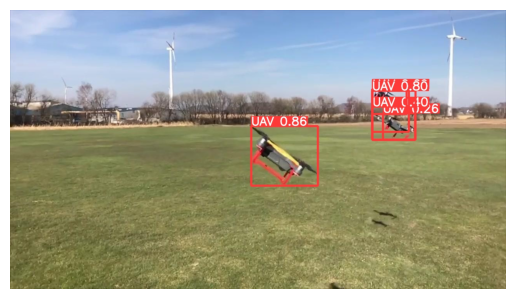

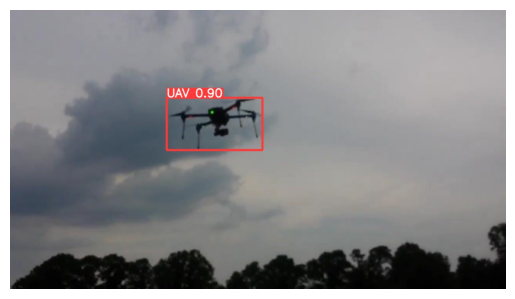

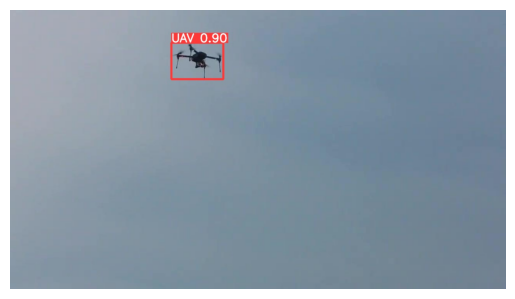

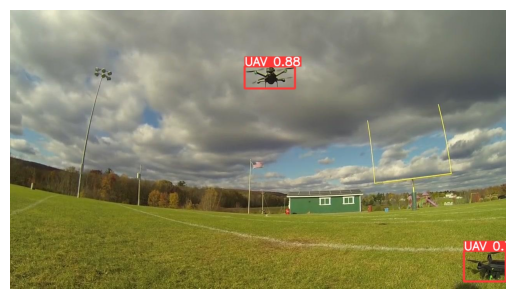

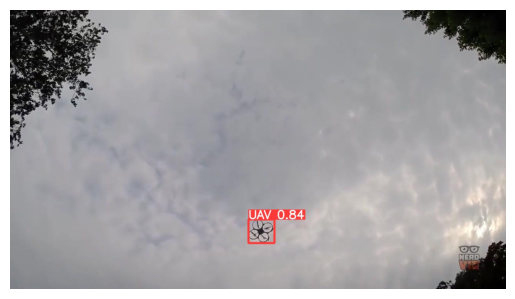

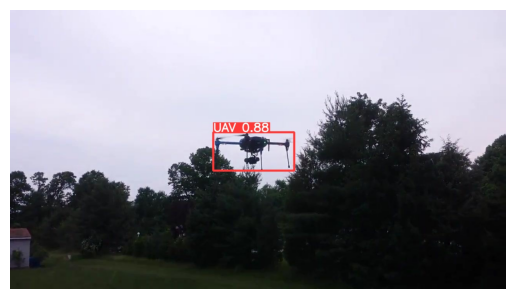

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob


# Function to display an image using matplotlib
def show_image(img_path):
    # Read the image using OpenCV
    img = cv2.imread(img_path)
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


# Get the list of result images
result_images = glob.glob('/content/Results/' + model_name +
                          '/*')  # Adjust the path if necessary
# Display each image
for img_path in result_images:
    show_image(img_path)

## Tracking Demo

In [ ]:
import gdown

# Define the URL and output path
file_id = '1dlSPDggg6TRFMcC1jlYIJxxzUQS1mIh9'
output = '/content/Tracking.zip'

# Download the file
gdown.download(f'https://drive.google.com/uc?id={file_id}',
               output,
               quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1dlSPDggg6TRFMcC1jlYIJxxzUQS1mIh9
From (redirected): https://drive.google.com/uc?id=1dlSPDggg6TRFMcC1jlYIJxxzUQS1mIh9&confirm=t&uuid=25e5ee53-1347-4c72-ba7d-0effbae851fb
To: /content/Tracking.zip
100%|██████████| 3.64G/3.64G [00:43<00:00, 83.0MB/s]


'/content/Tracking.zip'

In [ ]:
import zipfile
from PIL import Image as PILImage
import io
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import IPython
from IPython.display import Image, display
import time
import os

In [ ]:
model_name = 'YOLOv8x'
weight_path = '/content/Imported_Data/Weights/' + model_name + '/best.pt'
model = YOLO(weight_path)

In [ ]:
def read_video_folder(zip_file_path, video_name):
    images = []
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            # Check if the file is a folder matching the pattern "Anti-UAV-Tracking-V0/video*"
            if file_info.is_dir() and file_info.filename.startswith(
                    "Anti-UAV-Tracking-V0/" + video_name):
                folder_name = file_info.filename
                print(f"Found folder: {folder_name}")
                # Read images from the first folder found
                for file_info in zip_ref.infolist():
                    if file_info.filename.startswith(folder_name):
                        with zip_ref.open(file_info, 'r') as file:
                            # Read image from zip file
                            image_data = io.BytesIO(file.read())
                            nparr = np.frombuffer(image_data.getvalue(),
                                                  dtype=np.uint8)
                            try:
                                image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
                                if image is not None:
                                    images.append(image)
                                else:
                                    print("Failed to decode an image.")
                            except:
                                print(
                                    f"Error decoding one image: {file_info.filename} -- skipping"
                                )
    return images

In [ ]:
video_list = ['video01']
videos = video_list
zip_file_path = "/content/Tracking.zip"

for video in videos:
    print(f'Processing... {video}\n')
    image_list = read_video_folder(zip_file_path, video)
    print(
        f"Total images in folder '{video}': {len(image_list)}. The shape is: {image_list[0].shape}"
    )

Processing... video01

Found folder: Anti-UAV-Tracking-V0/video01/
Error decoding one image: Anti-UAV-Tracking-V0/video01/ -- skipping
Failed to decode an image.
Total images in folder 'video01': 1050. The shape is: (1080, 1920, 3)


In [ ]:
folder_path = '/content/Results/Tracking/'
os.makedirs(folder_path, exist_ok=True)
annotated_frame_list = []
idx = 0
for frame in image_list[350:400]:  # Only the first 500 frame
    idx += 1
    print(f'\nframe {idx}/{len(image_list)}\n')
    try:
        results = model.track(frame, persist=True)
    except:
        print(f"\nSkipping frame {idx}\n")
        continue
    annotated_frame = results[0].plot()
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    annotated_frame_list.append(annotated_frame)


frame 1/1050



0: 384x640 1 UAV, 74.1ms
Speed: 3.9ms preprocess, 74.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 61.8ms
Speed: 3.1ms preprocess, 61.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)




frame 2/1050


frame 3/1050



0: 384x640 1 UAV, 61.7ms
Speed: 3.1ms preprocess, 61.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 57.9ms
Speed: 3.0ms preprocess, 57.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)




frame 4/1050


frame 5/1050



0: 384x640 1 UAV, 58.4ms
Speed: 4.8ms preprocess, 58.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 52.6ms
Speed: 3.0ms preprocess, 52.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)




frame 6/1050


frame 7/1050



0: 384x640 1 UAV, 52.6ms
Speed: 3.2ms preprocess, 52.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 51.5ms
Speed: 3.3ms preprocess, 51.5ms inference, 8.8ms postprocess per image at shape (1, 3, 384, 640)




frame 8/1050


frame 9/1050



0: 384x640 1 UAV, 52.3ms
Speed: 5.8ms preprocess, 52.3ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 48.4ms
Speed: 3.1ms preprocess, 48.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)




frame 10/1050


frame 11/1050



0: 384x640 1 UAV, 68.1ms
Speed: 5.0ms preprocess, 68.1ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)




frame 12/1050



0: 384x640 1 UAV, 91.3ms
Speed: 5.6ms preprocess, 91.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 63.1ms
Speed: 2.9ms preprocess, 63.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)




frame 13/1050


frame 14/1050



0: 384x640 (no detections), 101.9ms
Speed: 26.5ms preprocess, 101.9ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 57.7ms
Speed: 2.8ms preprocess, 57.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)




frame 15/1050


frame 16/1050



0: 384x640 1 UAV, 51.0ms
Speed: 6.2ms preprocess, 51.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 44.3ms
Speed: 8.8ms preprocess, 44.3ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)




frame 17/1050


frame 18/1050



0: 384x640 (no detections), 75.1ms
Speed: 2.9ms preprocess, 75.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 UAVs, 44.2ms
Speed: 15.0ms preprocess, 44.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



frame 19/1050




0: 384x640 1 UAV, 46.0ms
Speed: 5.1ms preprocess, 46.0ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)




frame 20/1050


frame 21/1050



0: 384x640 1 UAV, 60.4ms
Speed: 10.9ms preprocess, 60.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 51.9ms
Speed: 3.8ms preprocess, 51.9ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)




frame 22/1050


frame 23/1050



0: 384x640 1 UAV, 56.5ms
Speed: 3.2ms preprocess, 56.5ms inference, 10.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 52.1ms
Speed: 5.5ms preprocess, 52.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)



frame 24/1050




0: 384x640 1 UAV, 45.7ms
Speed: 4.2ms preprocess, 45.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)




frame 25/1050


frame 26/1050



0: 384x640 1 UAV, 45.9ms
Speed: 3.2ms preprocess, 45.9ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 45.5ms
Speed: 7.8ms preprocess, 45.5ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)



frame 27/1050




0: 384x640 1 UAV, 50.2ms
Speed: 3.2ms preprocess, 50.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)




frame 28/1050


frame 29/1050



0: 384x640 1 UAV, 71.0ms
Speed: 7.4ms preprocess, 71.0ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 60.1ms
Speed: 4.9ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)




frame 30/1050


frame 31/1050



0: 384x640 1 UAV, 70.1ms
Speed: 2.9ms preprocess, 70.1ms inference, 25.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 58.5ms
Speed: 14.0ms preprocess, 58.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)




frame 32/1050


frame 33/1050



0: 384x640 1 UAV, 60.4ms
Speed: 3.2ms preprocess, 60.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 57.2ms
Speed: 3.6ms preprocess, 57.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)




frame 34/1050


frame 35/1050



0: 384x640 1 UAV, 52.7ms
Speed: 5.9ms preprocess, 52.7ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 52.6ms
Speed: 3.0ms preprocess, 52.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)




frame 36/1050


frame 37/1050



0: 384x640 1 UAV, 52.7ms
Speed: 3.4ms preprocess, 52.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 44.9ms
Speed: 3.3ms preprocess, 44.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)




frame 38/1050


frame 39/1050



0: 384x640 1 UAV, 44.9ms
Speed: 3.3ms preprocess, 44.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 44.9ms
Speed: 3.4ms preprocess, 44.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)




frame 40/1050


frame 41/1050



0: 384x640 1 UAV, 74.7ms
Speed: 3.2ms preprocess, 74.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 43.7ms
Speed: 4.6ms preprocess, 43.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)




frame 42/1050


frame 43/1050



0: 384x640 1 UAV, 43.7ms
Speed: 3.0ms preprocess, 43.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 43.7ms
Speed: 3.0ms preprocess, 43.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 43.7ms



frame 44/1050


frame 45/1050



Speed: 2.9ms preprocess, 43.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 43.6ms
Speed: 3.2ms preprocess, 43.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 40.4ms
Speed: 3.0ms preprocess, 40.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



frame 46/1050


frame 47/1050


frame 48/1050




0: 384x640 1 UAV, 40.4ms
Speed: 3.1ms preprocess, 40.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 UAV, 40.5ms
Speed: 4.5ms preprocess, 40.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)




frame 49/1050


frame 50/1050



0: 384x640 1 UAV, 40.5ms
Speed: 5.0ms preprocess, 40.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)


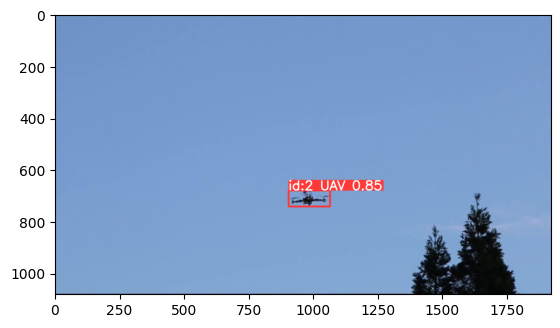

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a figure and axis to display the images
fig, ax = plt.subplots()

# Initialize the display with the first image
im = ax.imshow(annotated_frame_list[0], animated=True)


def update(frame):
    im.set_data(frame)
    return [im]


# Create an animation
ani = FuncAnimation(fig,
                    update,
                    frames=annotated_frame_list,
                    interval=80,
                    blit=True)

# Display the animation in the notebook
HTML(ani.to_jshtml())